In [1]:
import math
import random
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
training_data=pd.read_csv("Training_data.csv",names=["x_distance","y_distance","output_veocity_v1","output_velocity_v2"])
data=training_data.values[:,:2]
output=training_data.values[:,2:]
print(training_data)
print(data)
print(output)

      x_distance  y_distance  output_veocity_v1  output_velocity_v2
0       0.797973    0.577662           0.170334            0.619873
1       0.797964    0.578415           0.159200            0.616207
2       0.797988    0.579357           0.148133            0.624779
3       0.797935    0.580484           0.137162            0.623067
4       0.797898    0.581797           0.126312            0.622325
...          ...         ...                ...                 ...
4543    0.634789    0.440696           0.246486            0.622437
4544    0.634757    0.440167           0.235962            0.623617
4545    0.634715    0.439815           0.225437            0.624798
4546    0.634662    0.439641           0.214913            0.625978
4547    0.634598    0.439644           0.204388            0.627158

[4548 rows x 4 columns]
[[0.79797288 0.57766166]
 [0.79796406 0.57841533]
 [0.79798817 0.57935656]
 ...
 [0.63471479 0.43981543]
 [0.63466174 0.43964093]
 [0.63459809 0.4396437 ]]
[[0

In [3]:
testing_data=pd.read_csv(r"Testing_data.csv",names=["x_distance","y_distance","output_veocity_v1","output_velocity_v2"])

validation_data=testing_data.values[:,:2]
validation_output=testing_data.values[:,2:]

print(testing_data)
print(validation_data)
print(validation_output)

      x_distance  y_distance  output_veocity_v1  output_velocity_v2
0       0.634524    0.439824           0.193864            0.628338
1       0.634439    0.440181           0.183339            0.629518
2       0.634344    0.440716           0.172815            0.630698
3       0.634238    0.441428           0.184004            0.625068
4       0.634182    0.441951           0.195193            0.619438
...          ...         ...                ...                 ...
1944    0.640466    0.008392           0.320218            0.618239
1945    0.640472    0.006620           0.331408            0.623869
1946    0.640427    0.004661           0.320218            0.618239
1947    0.640433    0.002890           0.309029            0.623869
1948    0.640388    0.001307           0.297840            0.618239

[1949 rows x 4 columns]
[[0.63452384 0.43982375]
 [0.634439   0.44018108]
 [0.63434356 0.44071569]
 ...
 [0.64042732 0.00466097]
 [0.64043317 0.00288994]
 [0.64038846 0.00130738]]
[[0

In [4]:
predicted_output=[]
lam=0.5
learning_rate=0.2
momentum=0.3

In [5]:
def weight(size,index):
    weights = []
    for i in range(size):

        rand=random.uniform(-1, 1)
        weights.append(rand)
        
    return weights

In [6]:
class Neuron():
    
    def __init__(self,av,num_weights,index_neuron):
        self.av=av
        self.num_weights=num_weights
        self.index_neuron=index_neuron
        self.grad_value=0.0    #initilising gradient value
        self.weights=[]
        self.weights=weight(self.num_weights,self.index_neuron)#initialising weights with random numbers between -1 and 1
        
        self.delta_weights=[]
        for i in range(self.num_weights):
              self.delta_weights.append(0.0) #initilising delta weights to a list with 0.0
                
    def multweights(self,prev_layer):
        result=prev_layer[-1].weights[self.index_neuron]

        for i in range(len(prev_layer)-1):
            result+=prev_layer[i].av*prev_layer[i].weights[self.index_neuron]
        activation= 1/(1+math.exp(-1*lam*(result)))
        return activation

In [7]:
input_layer=[Neuron(0,4,0),Neuron(0,4,1),Neuron(1,4,2)]
hidden_layer=[Neuron(0,2,0),Neuron(0,2,1),Neuron(0,2,2),Neuron(0,2,3),Neuron(1,2,4)]
output_layer=[Neuron(0,0,0),Neuron(0,0,1)]

In [8]:
def feedforward_process(data):
    
    predicted_output=[]
    
    for i in range(len(input_layer)-1):
        input_layer[i].av=data[i]
        
    for i in range(len(hidden_layer)-1):
        hidden_layer[i].av=hidden_layer[i].multweights(input_layer)
        
    for i in range(len(output_layer)):
        output_layer[i].av=output_layer[i].multweights(hidden_layer)
        #predicted_output.append(output_layer.av)
        
    
        
        
        

In [9]:
def back_propagation(output):
    error=[]
    
    
    
    for i in range(len(output_layer)):
        error.append((output[i]-output_layer[i].av))
    
    for i in range(len(output_layer)):   
        output_layer[i].grad_val=lam*output_layer[i].av*(1-output_layer[i].av)*error[i]
        
    for i in range(len(hidden_layer)):
        weights=0
        for j in range(hidden_layer[i].num_weights):
            weights+=output_layer[j].grad_val*hidden_layer[i].weights[j]
        hidden_layer[i].grad_val=lam*hidden_layer[i].av*(1-hidden_layer[i].av)*weights
        
    for i in range(len(hidden_layer)):
        for j in range(hidden_layer[i].num_weights):
            hidden_layer[i].delta_weights[j]=(learning_rate*output_layer[j].grad_val*hidden_layer[i].av)+(momentum*hidden_layer[i].delta_weights[j])
            
    for i in range(len(input_layer)):
        for j in range(input_layer[i].num_weights):
            input_layer[i].delta_weights[j]=(learning_rate*hidden_layer[j].grad_val*input_layer[i].av)+(momentum*input_layer[i].delta_weights[j])
            
    for i in range(len(hidden_layer)):
        for j in range(hidden_layer[i].num_weights):
            hidden_layer[i].weights[j]+=hidden_layer[i].delta_weights[j]
            
    for i in range(len(input_layer)):
        for j in range(input_layer[i].num_weights):
            input_layer[i].weights[j]+=input_layer[i].delta_weights[j]
          
    for i in range(len(error)):
        error[i]=error[i]**2
    
    ##print("squared error in back propagation =",error)    
    mean_squared_error=sum(error)/len(error)
    
    return mean_squared_error
        
        

In [10]:
epoch=0
training_error_list=[]
testing_error_list=[]
weights_list=[]

In [11]:
for i in range(1000):
    mean_sq_error=[]
    mean_sq_error_validation=[]
    
    
    print("epoch =",epoch)
    epoch=epoch+1
    
    for i in range(len(data)):
        feedforward_process(data[i])
        mean_sq_error.append(back_propagation(output[i]))
                       
    #print("mean sq error list of training =",len(mean_sq_error))        
    root_mean_sq=math.sqrt(sum(mean_sq_error)/len(mean_sq_error))
    training_error_list.append(root_mean_sq)
    print("root mean sq error of training data =",root_mean_sq)
    
    for i in range(len(validation_data)):
        
        feedforward_process(validation_data[i])
        error=[]
        for j in range(len(output_layer)):
            e=(validation_output[i][j]- output_layer[j].av)**2
            error.append(e)
      
        mean_sq_error_validation.append(sum(error)/len(error))
    #print("mean sq error list of validation data =",len(mean_sq_error_validation))    
    root_mean_sq_validation=math.sqrt(sum(mean_sq_error_validation)/len(mean_sq_error_validation))
    testing_error_list.append(root_mean_sq_validation)
    
    
    
    
    input_layer_weights=[]
    hidden_layer_weights=[]

    for i in range(len(input_layer)):
        for j in range(input_layer[i].num_weights):

              input_layer_weights.append(input_layer[i].weights[j])
              

    
    for i in range(len(hidden_layer)):
        for j in range(hidden_layer[i].num_weights):
            hidden_layer_weights.append(hidden_layer[i].weights[j])
        
    
    ls=[input_layer_weights,hidden_layer_weights]
            
    weights_list.append(ls)
    print("root mean sq error of testing data =",root_mean_sq_validation)


epoch = 0
root mean sq error of training data = 0.10230239352385895
root mean sq error of testing data = 0.1422018511943864
epoch = 1
root mean sq error of training data = 0.097159277101656
root mean sq error of testing data = 0.1421830478591732
epoch = 2
root mean sq error of training data = 0.09696377196178892
root mean sq error of testing data = 0.14217236723842813
epoch = 3
root mean sq error of training data = 0.09677596957628183
root mean sq error of testing data = 0.14216654238496867
epoch = 4
root mean sq error of training data = 0.09659625780071701
root mean sq error of testing data = 0.14216248680732568
epoch = 5
root mean sq error of training data = 0.09642504287915014
root mean sq error of testing data = 0.14215723765442348
epoch = 6
root mean sq error of training data = 0.09626267671096589
root mean sq error of testing data = 0.142147915291027
epoch = 7
root mean sq error of training data = 0.09610939844369863
root mean sq error of testing data = 0.1421316943505943
epoch =

root mean sq error of training data = 0.09058116197908071
root mean sq error of testing data = 0.10747833539621128
epoch = 67
root mean sq error of training data = 0.09063644132749564
root mean sq error of testing data = 0.10751113638524709
epoch = 68
root mean sq error of training data = 0.09068993901668182
root mean sq error of testing data = 0.10754405650155872
epoch = 69
root mean sq error of training data = 0.09074161084187142
root mean sq error of testing data = 0.10757664012498364
epoch = 70
root mean sq error of training data = 0.09079143590754804
root mean sq error of testing data = 0.10760852207358967
epoch = 71
root mean sq error of training data = 0.09083941237662743
root mean sq error of testing data = 0.1076394128425189
epoch = 72
root mean sq error of training data = 0.0908855538065239
root mean sq error of testing data = 0.10766908598804185
epoch = 73
root mean sq error of training data = 0.09092988601406754
root mean sq error of testing data = 0.10769736738229845
epoch

root mean sq error of training data = 0.09180490515031929
root mean sq error of testing data = 0.10705250920911477
epoch = 132
root mean sq error of training data = 0.09180477562201027
root mean sq error of testing data = 0.10701592207508999
epoch = 133
root mean sq error of training data = 0.09180432947065832
root mean sq error of testing data = 0.10697880346957911
epoch = 134
root mean sq error of training data = 0.0918035700383968
root mean sq error of testing data = 0.10694116295334245
epoch = 135
root mean sq error of training data = 0.09180250054034853
root mean sq error of testing data = 0.10690300987493312
epoch = 136
root mean sq error of training data = 0.09180112407796032
root mean sq error of testing data = 0.10686435338968905
epoch = 137
root mean sq error of training data = 0.09179944365184664
root mean sq error of testing data = 0.10682520247850684
epoch = 138
root mean sq error of training data = 0.09179746217417933
root mean sq error of testing data = 0.106785565966406

root mean sq error of training data = 0.09127804041517705
root mean sq error of testing data = 0.10397527247968953
epoch = 197
root mean sq error of training data = 0.09126477983026106
root mean sq error of testing data = 0.1039248721550553
epoch = 198
root mean sq error of training data = 0.09125149234876996
root mean sq error of testing data = 0.10387468756960991
epoch = 199
root mean sq error of training data = 0.09123818454155172
root mean sq error of testing data = 0.10382473335362842
epoch = 200
root mean sq error of training data = 0.09122486290887862
root mean sq error of testing data = 0.10377502392439968
epoch = 201
root mean sq error of training data = 0.09121153386855829
root mean sq error of testing data = 0.10372557346083484
epoch = 202
root mean sq error of training data = 0.0911982037440889
root mean sq error of testing data = 0.10367639587836519
epoch = 203
root mean sq error of training data = 0.09118487875289631
root mean sq error of testing data = 0.1036275048042452

root mean sq error of training data = 0.09053005067317801
root mean sq error of testing data = 0.10150827118020883
epoch = 262
root mean sq error of training data = 0.09052074701514748
root mean sq error of testing data = 0.10148373550427454
epoch = 263
root mean sq error of training data = 0.09051146244253556
root mean sq error of testing data = 0.10145948788777051
epoch = 264
root mean sq error of training data = 0.09050219411368057
root mean sq error of testing data = 0.10143552001452054
epoch = 265
root mean sq error of training data = 0.09049293931263348
root mean sq error of testing data = 0.10141182360095398
epoch = 266
root mean sq error of training data = 0.09048369545901647
root mean sq error of testing data = 0.10138839040397195
epoch = 267
root mean sq error of training data = 0.09047446011686254
root mean sq error of testing data = 0.10136521222760148
epoch = 268
root mean sq error of training data = 0.09046523100231044
root mean sq error of testing data = 0.10134228092843

root mean sq error of training data = 0.08990373483946511
root mean sq error of testing data = 0.10018918442191538
epoch = 327
root mean sq error of training data = 0.08989250797677886
root mean sq error of testing data = 0.10016904696819423
epoch = 328
root mean sq error of training data = 0.08988115682000777
root mean sq error of testing data = 0.10014883579367273
epoch = 329
root mean sq error of training data = 0.08986967641929619
root mean sq error of testing data = 0.10012854984750824
epoch = 330
root mean sq error of training data = 0.0898580617678391
root mean sq error of testing data = 0.1001081881269759
epoch = 331
root mean sq error of training data = 0.08984630779785978
root mean sq error of testing data = 0.10008774966801667
epoch = 332
root mean sq error of training data = 0.08983440937587174
root mean sq error of testing data = 0.10006723353631533
epoch = 333
root mean sq error of training data = 0.08982236129726907
root mean sq error of testing data = 0.1000466388189354

root mean sq error of training data = 0.0885996359810301
root mean sq error of testing data = 0.09870332330129127
epoch = 392
root mean sq error of training data = 0.08856281383689402
root mean sq error of testing data = 0.09867985774902516
epoch = 393
root mean sq error of training data = 0.08852519728652705
root mean sq error of testing data = 0.09865676433128277
epoch = 394
root mean sq error of training data = 0.0884867797370602
root mean sq error of testing data = 0.09863410059195431
epoch = 395
root mean sq error of training data = 0.08844755616421894
root mean sq error of testing data = 0.0986119289887906
epoch = 396
root mean sq error of training data = 0.0884075232368767
root mean sq error of testing data = 0.09859031708088808
epoch = 397
root mean sq error of training data = 0.08836667943411872
root mean sq error of testing data = 0.09856933768995053
epoch = 398
root mean sq error of training data = 0.08832502515213433
root mean sq error of testing data = 0.09854906902959765


root mean sq error of training data = 0.08513431395509487
root mean sq error of testing data = 0.10201471762078712
epoch = 457
root mean sq error of training data = 0.0850747972784294
root mean sq error of testing data = 0.10217859539757643
epoch = 458
root mean sq error of training data = 0.0850152177076564
root mean sq error of testing data = 0.10234495174800085
epoch = 459
root mean sq error of training data = 0.08495557445115598
root mean sq error of testing data = 0.10251366844845582
epoch = 460
root mean sq error of training data = 0.08489586683995376
root mean sq error of testing data = 0.10268462689496308
epoch = 461
root mean sq error of training data = 0.08483609434048694
root mean sq error of testing data = 0.1028577083835869
epoch = 462
root mean sq error of training data = 0.08477625656535613
root mean sq error of testing data = 0.10303279437520967
epoch = 463
root mean sq error of training data = 0.08471635328221115
root mean sq error of testing data = 0.10320976674445899

root mean sq error of training data = 0.08119729170020223
root mean sq error of testing data = 0.1136129432512295
epoch = 522
root mean sq error of training data = 0.08113791224117453
root mean sq error of testing data = 0.11376085555774779
epoch = 523
root mean sq error of training data = 0.08107866619382958
root mean sq error of testing data = 0.11390714458662357
epoch = 524
root mean sq error of training data = 0.08101955856306858
root mean sq error of testing data = 0.11405180558291114
epoch = 525
root mean sq error of training data = 0.08096059434578476
root mean sq error of testing data = 0.11419483485539167
epoch = 526
root mean sq error of training data = 0.0809017785257323
root mean sq error of testing data = 0.11433622974126717
epoch = 527
root mean sq error of training data = 0.0808431160683538
root mean sq error of testing data = 0.11447598857103115
epoch = 528
root mean sq error of training data = 0.0807846119155865
root mean sq error of testing data = 0.1146141106335075
e

root mean sq error of training data = 0.07779383030967918
root mean sq error of testing data = 0.12010649123357738
epoch = 587
root mean sq error of training data = 0.07775060653423506
root mean sq error of testing data = 0.12016530983954507
epoch = 588
root mean sq error of training data = 0.077707683331426
root mean sq error of testing data = 0.12022319807095413
epoch = 589
root mean sq error of training data = 0.07766506034923688
root mean sq error of testing data = 0.12028016980909088
epoch = 590
root mean sq error of training data = 0.07762273717910186
root mean sq error of testing data = 0.120336238840935
epoch = 591
root mean sq error of training data = 0.0775807133580144
root mean sq error of testing data = 0.12039141885686663
epoch = 592
root mean sq error of training data = 0.07753898837060609
root mean sq error of testing data = 0.12044572344855733
epoch = 593
root mean sq error of training data = 0.07749756165118972
root mean sq error of testing data = 0.12049916610703573
e

root mean sq error of training data = 0.07556994723159113
root mean sq error of testing data = 0.12252900844685265
epoch = 652
root mean sq error of training data = 0.07554415985801603
root mean sq error of testing data = 0.1225515927582959
epoch = 653
root mean sq error of training data = 0.07551859845605964
root mean sq error of testing data = 0.12257393199083128
epoch = 654
root mean sq error of training data = 0.07549326177239367
root mean sq error of testing data = 0.12259603373854579
epoch = 655
root mean sq error of training data = 0.0754681485656521
root mean sq error of testing data = 0.12261790553637789
epoch = 656
root mean sq error of training data = 0.07544325760698277
root mean sq error of testing data = 0.12263955486163977
epoch = 657
root mean sq error of training data = 0.07541858768059981
root mean sq error of testing data = 0.12266098913552728
epoch = 658
root mean sq error of training data = 0.07539413758433668
root mean sq error of testing data = 0.1226822157246051

root mean sq error of training data = 0.07432171139709225
root mean sq error of testing data = 0.12378823472209291
epoch = 717
root mean sq error of training data = 0.07430889794290178
root mean sq error of testing data = 0.1238087845596883
epoch = 718
root mean sq error of training data = 0.07429627702274286
root mean sq error of testing data = 0.12382949553820827
epoch = 719
root mean sq error of training data = 0.07428384916112132
root mean sq error of testing data = 0.1238503724052293
epoch = 720
root mean sq error of training data = 0.07427161491429914
root mean sq error of testing data = 0.12387141983808385
epoch = 721
root mean sq error of training data = 0.07425957486958698
root mean sq error of testing data = 0.12389264244232631
epoch = 722
root mean sq error of training data = 0.07424772964457736
root mean sq error of testing data = 0.12391404475023089
epoch = 723
root mean sq error of training data = 0.07423607988631079
root mean sq error of testing data = 0.1239356312193398

root mean sq error of training data = 0.07392300044315443
root mean sq error of testing data = 0.12561299001631218
epoch = 782
root mean sq error of training data = 0.07392423913007369
root mean sq error of testing data = 0.12565047297323798
epoch = 783
root mean sq error of training data = 0.07392570533380825
root mean sq error of testing data = 0.12568826961208582
epoch = 784
root mean sq error of training data = 0.07392739837305846
root mean sq error of testing data = 0.12572638040018042
epoch = 785
root mean sq error of training data = 0.07392931750403413
root mean sq error of testing data = 0.12576480576022453
epoch = 786
root mean sq error of training data = 0.07393146192065447
root mean sq error of testing data = 0.12580354606867472
epoch = 787
root mean sq error of training data = 0.07393383075484032
root mean sq error of testing data = 0.1258426016539363
epoch = 788
root mean sq error of training data = 0.07393642307689517
root mean sq error of testing data = 0.125881972794370

root mean sq error of training data = 0.07441161780824546
root mean sq error of testing data = 0.12867070138947798
epoch = 847
root mean sq error of training data = 0.07442411601025259
root mean sq error of testing data = 0.12872586582555087
epoch = 848
root mean sq error of training data = 0.07443671065128891
root mean sq error of testing data = 0.1287811766202915
epoch = 849
root mean sq error of training data = 0.07444939917409009
root mean sq error of testing data = 0.12883662734244605
epoch = 850
root mean sq error of training data = 0.07446217902540662
root mean sq error of testing data = 0.12889221148276062
epoch = 851
root mean sq error of training data = 0.07447504765648404
root mean sq error of testing data = 0.1289479224584118
epoch = 852
root mean sq error of training data = 0.07448800252351821
root mean sq error of testing data = 0.1290037536175165
epoch = 853
root mean sq error of training data = 0.07450104108809412
root mean sq error of testing data = 0.12905969824369196

root mean sq error of training data = 0.07531831266384717
root mean sq error of testing data = 0.13226412073316884
epoch = 912
root mean sq error of training data = 0.0753321425497556
root mean sq error of testing data = 0.13231498029975558
epoch = 913
root mean sq error of training data = 0.07534592317089966
root mean sq error of testing data = 0.13236558877391463
epoch = 914
root mean sq error of training data = 0.0753596527396395
root mean sq error of testing data = 0.13241594252824063
epoch = 915
root mean sq error of training data = 0.07537332948570338
root mean sq error of testing data = 0.13246603804198745
epoch = 916
root mean sq error of training data = 0.07538695165639785
root mean sq error of testing data = 0.13251587190082934
epoch = 917
root mean sq error of training data = 0.07540051751682265
root mean sq error of testing data = 0.13256544079655225
epoch = 918
root mean sq error of training data = 0.07541402535009425
root mean sq error of testing data = 0.1326147415266660

root mean sq error of training data = 0.07605076017722064
root mean sq error of testing data = 0.13495498734701722
epoch = 977
root mean sq error of training data = 0.07605862705438403
root mean sq error of testing data = 0.13498605323281135
epoch = 978
root mean sq error of training data = 0.07606637833921047
root mean sq error of testing data = 0.13501681196454754
epoch = 979
root mean sq error of training data = 0.07607401408581718
root mean sq error of testing data = 0.13504726459650493
epoch = 980
root mean sq error of training data = 0.07608153438953354
root mean sq error of testing data = 0.13507741221220795
epoch = 981
root mean sq error of training data = 0.07608893938709803
root mean sq error of testing data = 0.13510725592346895
epoch = 982
root mean sq error of training data = 0.07609622925682066
root mean sq error of testing data = 0.13513679686945074
epoch = 983
root mean sq error of training data = 0.07610340421871803
root mean sq error of testing data = 0.13516603621577

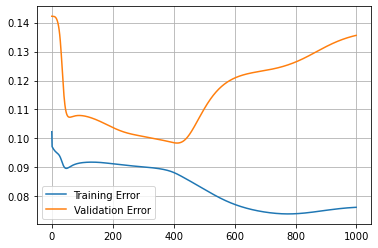

In [12]:
ep=[]

for i in range(epoch):
    ep.append(i)
    
plt.plot(ep,training_error_list,label="Training Error")
plt.plot(ep,testing_error_list,label="Validation Error")
plt.legend()
plt.grid()
plt.show()

In [13]:
print(weights_list[405]) # we can see that the neural network converges at the epoch 405

[[3.168763268613677, -14.954497582830724, 15.16817462797441, -0.020441249189946154, 1.00572989377143, 1.9134008748976803, -0.2268943928710293, -2.3827030403123195, -4.850942544567641, 3.6614246349906328, -8.01471306004842, -1.2926557593894057], [-3.4201179370156387, 0.7355395604589042, -7.772971749557571, 3.4446536559967305, -4.0105591530058495, 6.765928625759832, 1.5007928765025331, 0.262884390005611, 1.927457874563993, -3.895529439946665]]


In [14]:
input_layer_w=weights_list[405][0]

In [15]:
print(input_layer_w)

[3.168763268613677, -14.954497582830724, 15.16817462797441, -0.020441249189946154, 1.00572989377143, 1.9134008748976803, -0.2268943928710293, -2.3827030403123195, -4.850942544567641, 3.6614246349906328, -8.01471306004842, -1.2926557593894057]


In [16]:
hidden_layer_w=weights_list[405][1]
hidden_layer_w

[-3.4201179370156387,
 0.7355395604589042,
 -7.772971749557571,
 3.4446536559967305,
 -4.0105591530058495,
 6.765928625759832,
 1.5007928765025331,
 0.262884390005611,
 1.927457874563993,
 -3.895529439946665]

In [17]:
hidden_layer_w.append(0.0)
hidden_layer_w.append(0.0)
hidden_layer_w

[-3.4201179370156387,
 0.7355395604589042,
 -7.772971749557571,
 3.4446536559967305,
 -4.0105591530058495,
 6.765928625759832,
 1.5007928765025331,
 0.262884390005611,
 1.927457874563993,
 -3.895529439946665,
 0.0,
 0.0]

In [18]:
df = pd.DataFrame({'input_layer_weights': input_layer_w,
                   'hidden_layer_weights': hidden_layer_w})
df.to_csv(path_or_buf="weights",index=False)

In [13]:
input_layer_weights=[]
hidden_layer_weights=[]

for i in range(len(input_layer)):
    for j in range(input_layer[i].num_weights):
        
          input_layer_weights.append(input_layer[i].weights[j])
          print("input layer",i,"weights",j,"=",input_layer[i].weights[j])

print(input_layer_weights)
for i in range(len(hidden_layer)):
    for j in range(hidden_layer[i].num_weights):
        
        hidden_layer_weights.append(hidden_layer[i].weights[j])
        print("hidden layer",i,"weights",j,"=",hidden_layer[i].weights[j])
hidden_layer_weights.append(0.0)
hidden_layer_weights.append(0.0)
print(hidden_layer_weights)

input layer 0 weights 0 = -9.655780934243554
input layer 0 weights 1 = -1.623790374938795
input layer 0 weights 2 = 11.358278357999831
input layer 0 weights 3 = 42.99380534875713
input layer 1 weights 0 = -15.544829210925075
input layer 1 weights 1 = -16.02978837433453
input layer 1 weights 2 = -12.559271494835055
input layer 1 weights 3 = 1.059637945391623
input layer 2 weights 0 = 7.426231742548429
input layer 2 weights 1 = 3.6748287157215427
input layer 2 weights 2 = -3.846701537334575
input layer 2 weights 3 = -21.478839603564648
[-9.655780934243554, -1.623790374938795, 11.358278357999831, 42.99380534875713, -15.544829210925075, -16.02978837433453, -12.559271494835055, 1.059637945391623, 7.426231742548429, 3.6748287157215427, -3.846701537334575, -21.478839603564648]
hidden layer 0 weights 0 = 3.1321127995341818
hidden layer 0 weights 1 = 12.23309053474622
hidden layer 1 weights 0 = 9.674710310386711
hidden layer 1 weights 1 = -11.69808948017571
hidden layer 2 weights 0 = -11.758655

In [14]:
df = pd.DataFrame({'input_layer_weights': input_layer_weights,
                   'hidden_layer_weights': hidden_layer_weights})
df.to_csv(path_or_buf="weights",index=False)